In [1]:
# Basic data manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# NLP libraries
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [5]:
# Machine Learning and metrics libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [7]:
# Download nltk stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asmaul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asmaul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\asmaul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## **1. Data Exploration and Preprocessing**

In [11]:
# Load the IMDB dataset
df = pd.read_csv('Imdb.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


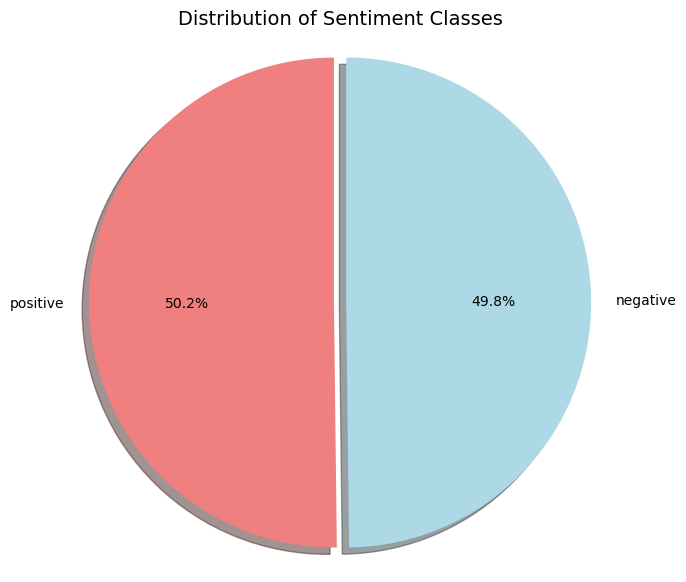

In [16]:
# Remove duplicates from the dataset
df.drop_duplicates(inplace=True)

# Calculate sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
sentiment_labels = sentiment_counts.index
sentiment_sizes = sentiment_counts.values

# Plot sentiment distribution as a pie chart
plt.figure(figsize=(7, 7))
plt.pie(sentiment_sizes, labels=sentiment_labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'], explode=(0.05, 0), shadow=True)
plt.title('Distribution of Sentiment Classes', fontsize=14)
plt.axis('equal')
plt.show()

In [18]:
# Preprocess the text (lowercase, remove special characters, tokenize, remove stopwords, and stemming)
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub('', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    words = [ps.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_review'] = df['review'].apply(preprocess_text)

df[['review', 'cleaned_review']].head()

,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one review mention watch 1 oz episod youll hoo...
1,A wonderful little production. <br /><br />The...,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,basic there famili littl boy jake think there ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visual stun film...


## **2. Feature Engineering**

In [20]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review']).toarray()

# Convert sentiments to binary (1 for positive, 0 for negative)
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (39664, 5000)
Testing set shape: (9917, 5000)


##  **3. Model Development**

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4995
           1       0.88      0.90      0.89      4922

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



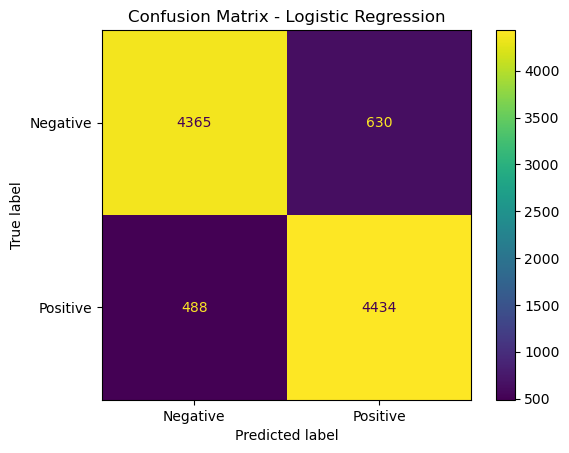

In [24]:
log_reg = LogisticRegression(max_iter=100)
log_reg_model = log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg_model.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Display the confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
ConfusionMatrixDisplay(cm_log_reg, display_labels=['Negative', 'Positive']).plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

## **4. Model Evaluation**

In [27]:
# LogisticRegression is best model for this project.
# SVM taking so much time to fit the model

In [29]:
def preprocess_text_input(text):
    text = text.lower()
    text = re.sub('', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    words = [ps.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [31]:
def predict_sentiment(review):
    processed_review = preprocess_text_input(review)
    review_tfidf = tfidf.transform([processed_review])
    prediction = log_reg_model.predict(review_tfidf)
    if prediction == 1:
        return "Positive review 😊", "positive"
    else:
        return "Negative review 😞", "negative"

In [33]:
# request user input for review
print("Enter a text to Classify its text (type 'exit' to stop):")

while True:
    user_input = input("Enter text: ")

    # if user type 'exit', break out of the loop
    if user_input.lower() == 'exit':
        print("Exiting the program.")
        break

    # predict sentiment for the entered review
    sentiment_result, sentiment_class = predict_sentiment(user_input)

    if sentiment_class == "positive":
        print(f"{sentiment_result}")
    else:
        print(f"{sentiment_result}")

Enter a text to Classify its text (type 'exit' to stop):


Enter text:  Movie is good.


Positive review 😊


Enter text:  Movie would be better.


Negative review 😞


Enter text:  exit


Exiting the program.
